In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json

In [2]:
working= os.environ.get("WORKING_DIRECTORY","/raid/homes/andrea.pedrotti/devel/control_mgt")
os.chdir(working)

## plots

In [15]:
feature_file = "profiling_results/adversarial_dataset/xsum/dpo-iter1-filtered-cut256/selected_feats.json" 

In [24]:
human_ref = "ilc_profiler/parsed/xsum/vanilla/human-cut256/human_doc.out"
llama_ref = "ilc_profiler/parsed/xsum/vanilla/llama-cut256/llama_doc.out"
llama_dpo_iter1_ling = "ilc_profiler/parsed/xsum/dpo-iter1/llama-dpo-iter1/0130-2348-cut256/llama-dpo-iter1_doc.out"
llama_dpo_iter_human = "ilc_profiler/parsed/xsum/dpo-iter1-naive/llama-dpo-iter1/2025-01-30-23-51/dpo-llama-1st-iter_doc.out"

human_profile = pd.read_csv(human_ref, sep="\t")
llama_profile = pd.read_csv(llama_ref, sep="\t")

llama_ling_profile = pd.read_csv(llama_dpo_iter1_ling, sep="\t")
llama_human_profile = pd.read_csv(llama_dpo_iter_human, sep="\t")

In [25]:
human_profile.shape, llama_ling_profile.shape, llama_profile.shape, llama_human_profile.shape

((100000, 155), (100000, 156), (100000, 155), (22500, 153))

In [27]:
human_profile = human_profile[human_profile.identifier.isin(llama_human_profile.identifier)].reset_index()
llama_profile = llama_profile[llama_profile.identifier.isin(llama_human_profile.identifier)].reset_index()
llama_ling_profile = llama_ling_profile[llama_ling_profile.identifier.isin(llama_human_profile.identifier)].reset_index()
human_profile.shape, llama_ling_profile.shape, llama_profile.shape, llama_human_profile.shape

((22500, 157), (22500, 157), (22500, 157), (22500, 153))

In [29]:
human_profile = human_profile[human_profile["ttr_form_chunks_200"] > 0.2]
llama_profile = llama_profile[llama_profile["ttr_form_chunks_200"] > 0.2]

llama_ling_profile = llama_ling_profile[llama_ling_profile["ttr_form_chunks_200"] > 0.2]
llama_human_profile = llama_human_profile[llama_human_profile["ttr_form_chunks_200"] > 0.2]

In [30]:
selected_feats = list(json.load(open(feature_file)).keys())
selected_feats

['ttr_form_chunks_100',
 'n_sentences',
 'ttr_form_chunks_200',
 'ttr_lemma_chunks_200',
 'n_tokens',
 'tokens_per_sent',
 'ttr_lemma_chunks_100',
 'lexical_density',
 'subj_post',
 'verbs_form_dist_Ger']

/tmp/ipykernel_3689262/1495559696.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


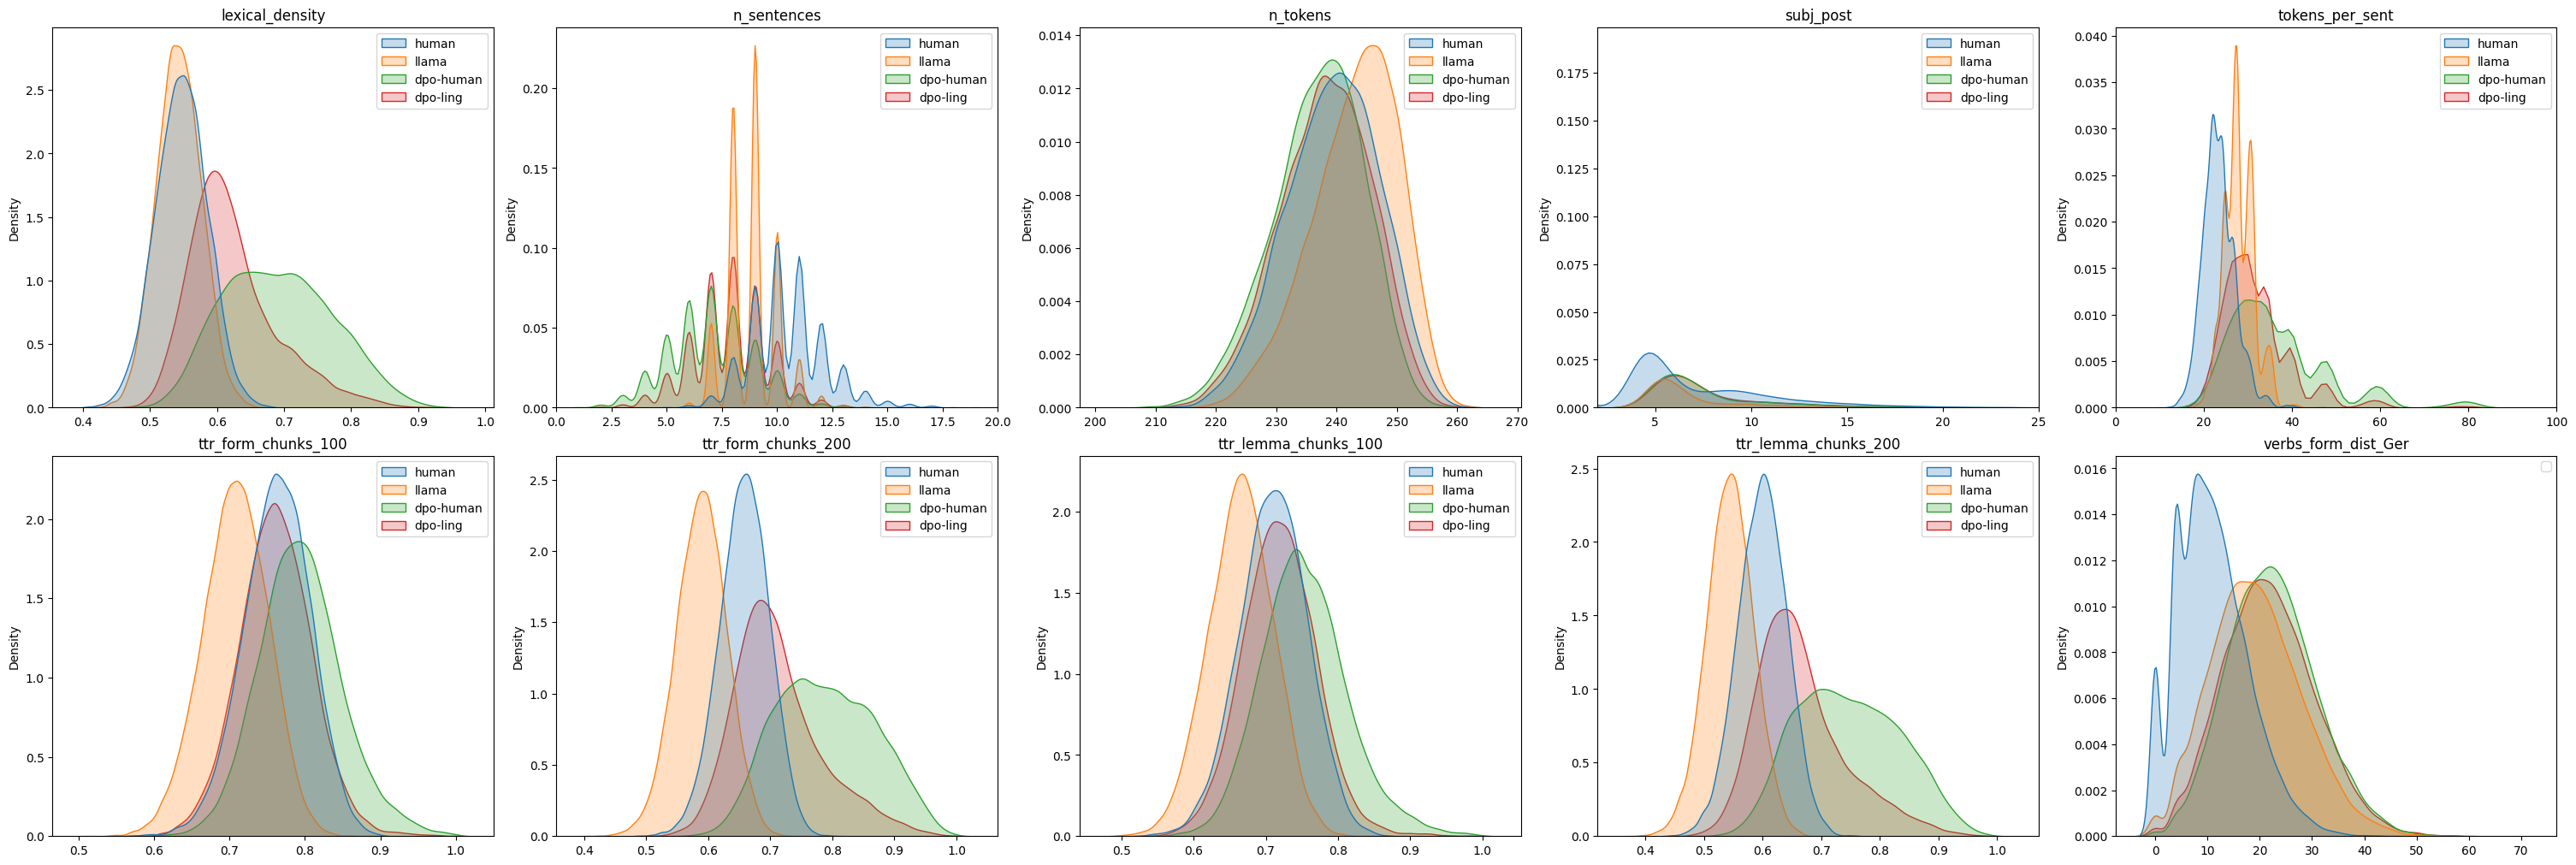

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10), layout="constrained", sharey=False)
axs = axs.ravel()

plot_df = pd.DataFrame()
for i, feat in enumerate(sorted(selected_feats)):
    plot_df["human"] = human_profile[feat]
    plot_df["llama"] = llama_profile[feat]
    plot_df["dpo-human"] = llama_human_profile[feat]
    plot_df["dpo-ling"] = llama_ling_profile[feat]
    
    sns.kdeplot(data=plot_df, ax=axs[i], fill=True, legend=True)
    
    if feat == "tokens_per_sent":
        axs[i].set_xlim((0, 100))
    
    if feat == "subj_post":
        axs[i].set_xlim((2, 25))
    
    if feat == "n_sentences":
        axs[i].set_xlim((0, 20))

    axs[i].set_title(feat)

plt.legend()
plt.show()

# Older

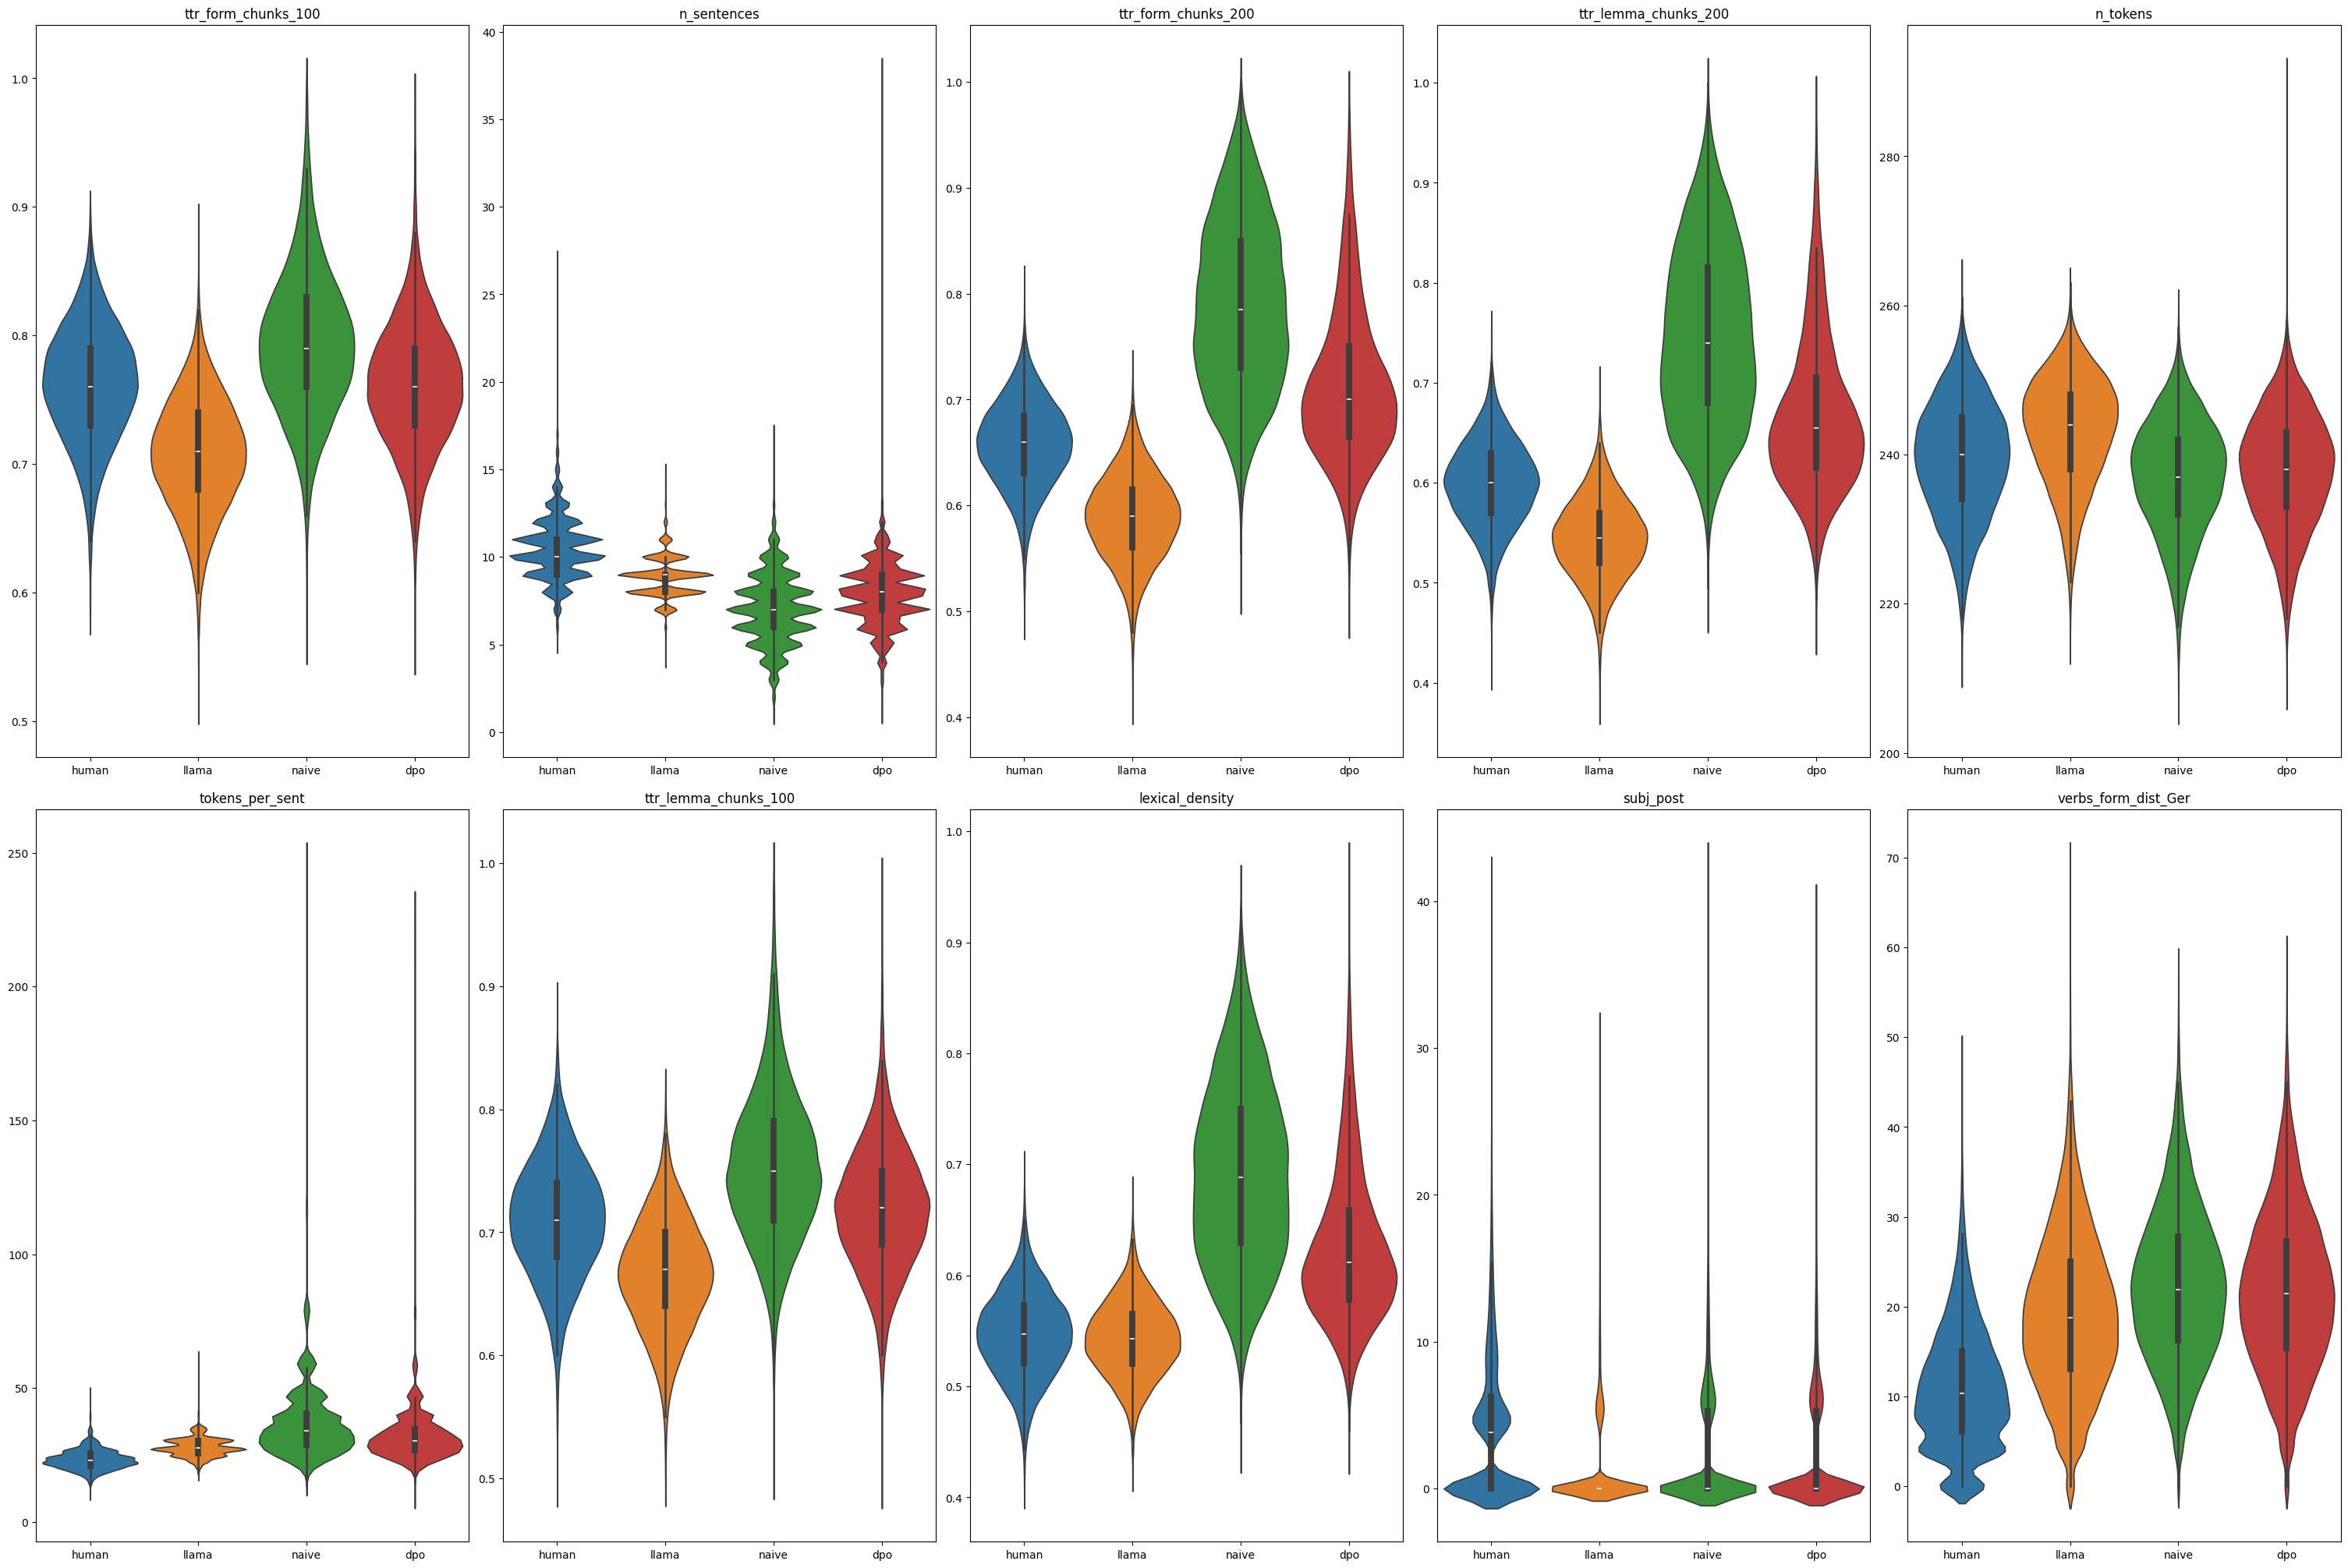

In [41]:
fig, axs = plt.subplots(2, 5, figsize=(30, 20), layout="constrained", sharey=False)
axs = axs.ravel()

plot_df = pd.DataFrame()
for i, feat in enumerate(selected_feats):
    plot_df["human"] = human_profile[feat]
    plot_df["llama"] = llama_profile[feat]
    plot_df["naive"] = llama_human_profile[feat]
    plot_df["dpo"] = dpo_hb_hlr[feat]
    
    sns.violinplot(data=plot_df, ax=axs[i], orient="v", gap=-0.1, split=False)
    
    axs[i].set_title(feat)

# plt.legend()
plt.show()